# IRIS DATASET IN SCIKIT-LEARN

## import libraries

In [1]:
from sklearn import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## plot style

In [2]:
plt.style.use('ggplot')

## load data

In [3]:
iris=datasets.load_iris()

type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
iris.data.shape   # 150 data samples and 4 features

(150, 4)

In [7]:
 iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## EDA 

In [8]:
## assign  target and data to x and y variables


x=iris.data

y=iris.target

# convert to dataframe
df=pd.DataFrame(x,columns=iris.feature_names)

print(df.head())
print(y)
y.shape

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(150,)

In [9]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


## visual EDA

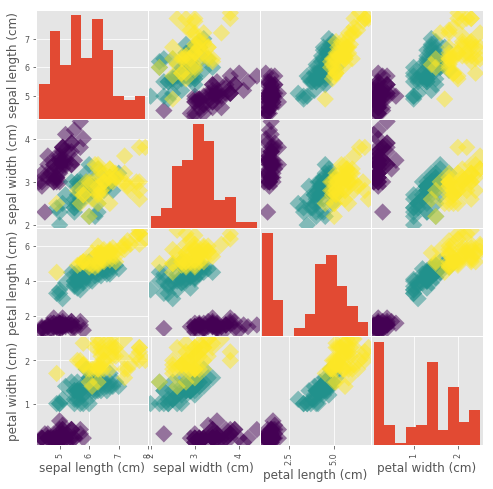

In [11]:
_=pd.plotting.scatter_matrix(df,c=y,figsize=(8,8),s=150,marker='D')

## import classifier model


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn=KNeighborsClassifier(n_neighbors=6)

## fit the model

In [14]:
# convert feature and response varibles to numpy arrays if not 
# The target needs to be a single column with the same number of observations as the feature data.
#x=df['target'].values


###  DataFrame.values attribute to return the numpy representation of the given DataFrame

In [15]:
knn.fit(iris['data'],iris['target'])
# knn.fit(iris.data,iris.target) both are same

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [16]:
iris['data'].shape

(150, 4)

In [17]:
iris['target'].shape

(150,)

## predict the data

In [18]:
#knn.predict()

# Measuring model performance

## 1. split data in train and test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

## train model on train data

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

## predict on test data

In [22]:
y_pred=knn.predict(x_test)

In [23]:
y_pred  #array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

## accuracy of model .score()

In [24]:
knn.score(x_test,y_test)

0.9555555555555556

## 2. model comlexity and over/under fitting

## note:
* large k=smoother boundary = less complex model
* less k = complex decision boundary= overfitting 

### Overfitting and underfitting

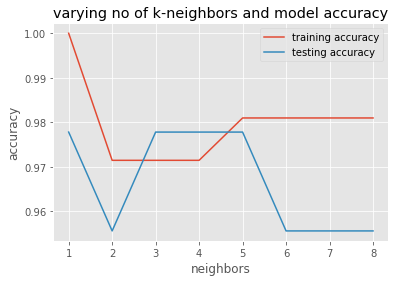

In [25]:
# setup arrays to store train and test accuracy

neighbors= np.arange(1,9)    # no of k neighbors

# initialise arrays  

train_accuracy=np.empty(len(neighbors))         
test_accuracy=np.empty(len(neighbors))

# loop over different values of k

for i,k in enumerate(neighbors):
    
    # setup k-neighbors classifiers with k neighbors
    knn=KNeighborsClassifier(k)
    
    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)
    
    
# plot the graph
plt.title("varying no of k-neighbors and model accuracy")
plt.plot(neighbors,train_accuracy,label="training accuracy")
plt.plot(neighbors,test_accuracy,label='testing accuracy')
plt.legend()
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.show()

## confusion matrix

 ## By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

In [26]:
from sklearn.metrics import confusion_matrix , classification_report

### # Generate the confusion matrix and classification report

In [27]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Hyperparameter tuning with GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV


### Setup the hyperparameter grid

In [29]:
param_grid={'n_neighbors':np.arange(1,50)}

### Instantiate the GridSearchCV object: knn

In [30]:
knn_cv=GridSearchCV(knn,param_grid,cv=5)

### Fit it to the data

In [31]:
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Print the tuned parameters and score

In [32]:
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 3}
Best score is 0.9714285714285714
